## Projct: Logistic Regression
By : Aaminah Arif - 100061200 and Sahlah Adesina - 100061415

#### Tasks:
1. Explain the Model
2. Description of the Data
3. Arrange Data
4. Training: Python + Gradient Descent

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Task 1: Explain the Model

Task 2: Description of the Data

In [3]:
#reading the data
quality_df = pd.read_excel('Data_Model_IoTMLCQ_2024.xlsx')
quality_df.head()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,0.0,8.355273,0.387898,0.020505,Yes,No,Normal,Safe,Stable
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,1.0,8.256397,0.343950,0.108561,No,No,Normal,Safe,Stable
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,2.0,8.511549,0.365285,0.410457,Yes,No,Normal,Safe,Stable
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,3.0,8.362301,0.189601,0.891217,No,No,Normal,Safe,Stable
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,4.0,8.003350,0.318775,0.936614,Yes,No,Normal,Safe,Stable


In [4]:
#checking if we have any null values in the dataset
quality_df.isnull()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


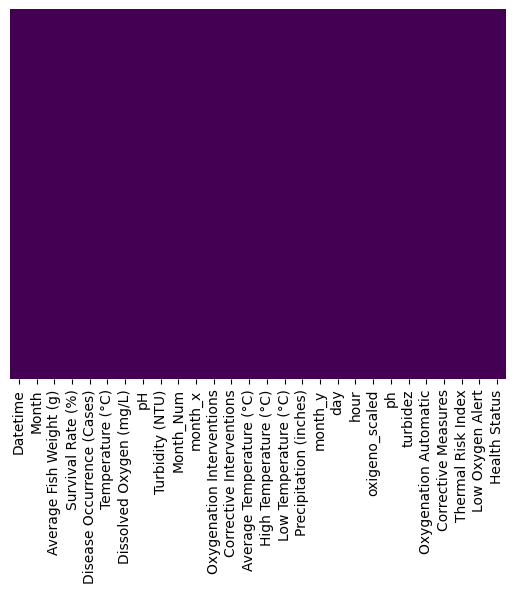

In [5]:
#plotting the null values using a heatmap
sns.heatmap(quality_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [6]:
# Summary of the information, checking our datatypes 
quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    4383 non-null   datetime64[ns]
 1   Month                       4383 non-null   object        
 2   Average Fish Weight (g)     4383 non-null   float64       
 3   Survival Rate (%)           4383 non-null   float64       
 4   Disease Occurrence (Cases)  4383 non-null   float64       
 5   Temperature (°C)            4383 non-null   float64       
 6   Dissolved Oxygen (mg/L)     4383 non-null   float64       
 7   pH                          4383 non-null   float64       
 8   Turbidity (NTU)             4383 non-null   float64       
 9   Month_Num                   4383 non-null   float64       
 10  month_x                     4383 non-null   float64       
 11  Oxygenation Interventions   4383 non-null   int64       

# Task 3: Arrange the Data

In [7]:
#check for features that are not numerical
quality_df.select_dtypes(include=['object']).columns


Index(['Month', 'Oxygenation Automatic', 'Corrective Measures',
       'Thermal Risk Index', 'Low Oxygen Alert', 'Health Status'],
      dtype='object')

In [8]:
# # The disease occurence column ranges from 1 -> 2, so 1.5 will be used as a threshold.
# # Anything above 1.5 is classified as disease not present (1)
# # Anything below as disease present (0)

health_status = []
for x in quality_df['Health Status']:
    if x == "Stable":
        health_status.append(1)
    elif x == "At Risk":
        health_status.append(0)
quality_df['Health Status'] = health_status

In [9]:
quality_df["Health Status"].value_counts()


Health Status
1    3678
0     705
Name: count, dtype: int64

### Converting Non-numeric values to integer values
The dataset contains several non-numeric columns that need to be transformed into a numerical format for machine learning models. Below is an explanation of how each column is processed.

1. **Health Status (Target Variable)**: We convert it into a binary classification:
    - Stable → 1 (Healthy)
    - At Risk → 0 (Unhealthy)

2. **Oxygenation Automatic**: This column contains Yes/No values. The new column Oxygenation_Automatic represents:
    - Yes → 1 
    - No → 0 (implicitly dropped)

3. **Corrective Measures**: This column contains Yes/No values. We apply one-hot encoding, keeping only one column The new column Corrective_Measures represents:
    - Yes → 1 
    - No → 0 (implicitly dropped)

4. **Thermal Risk Index**: This column contains categorical values, e.g., Normal, High, Low. We apply one-hot encoding, dropping the first category (Low).The remaining column Thermal_Risk_Index captures:
    - Normal → 1
    - High → 0 (implicitly dropped)

5. **Low Oxygen Alert**:This column contains Safe/Alert values.The new column Low_Oxygen_Alert represents:
    - Safe → 1
    - Alert → 0






In [10]:
pd.get_dummies(quality_df['Oxygenation Automatic'])

,No,Yes
0,False,True
1,True,False
2,False,True
3,True,False
4,False,True
...,...,...
4378,False,True
4379,True,False
4380,False,True
4381,True,False


In [11]:
oxygenation_automatic = pd.get_dummies(quality_df['Oxygenation Automatic'], drop_first=True)
oxygenation_automatic.rename(columns = {"Yes":"Oxygenation_Automatic"},inplace=True)
oxygenation_automatic.head()

,Oxygenation_Automatic
0,True
1,False
2,True
3,False
4,True


In [12]:
pd.get_dummies(quality_df['Corrective Measures'])

,No,Yes
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
4378,True,False
4379,True,False
4380,True,False
4381,True,False


In [13]:
corrective_measures = pd.get_dummies(quality_df['Corrective Measures'], drop_first=True)
corrective_measures.rename(columns = {"Yes":"Corrective_Measures"},inplace=True)
corrective_measures.head()

,Corrective_Measures
0,False
1,False
2,False
3,False
4,False


In [14]:
pd.get_dummies(quality_df['Thermal Risk Index'])

,High,Normal
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
4378,False,True
4379,False,True
4380,False,True
4381,False,True


In [15]:
thermal_risk_index = pd.get_dummies(quality_df['Thermal Risk Index'], drop_first=True)
thermal_risk_index.rename(columns = {"Normal":"Thermal_Risk_Index"},inplace=True)
thermal_risk_index.head()

,Thermal_Risk_Index
0,True
1,True
2,True
3,True
4,True


In [16]:
low_oxygen_alert = pd.get_dummies(quality_df['Low Oxygen Alert'])
low_oxygen_alert

,Safe
0,True
1,True
2,True
3,True
4,True
...,...
4378,True
4379,True
4380,True
4381,True


In [17]:
low_oxygen_alert.rename(columns = {"Safe":"Low_Oxygen_Alert"},inplace=True)
low_oxygen_alert


,Low_Oxygen_Alert
0,True
1,True
2,True
3,True
4,True
...,...
4378,True
4379,True
4380,True
4381,True


### Final Data Preparation
- We merge the new encoded columns back into the dataset.
- We drop the original categorical columns to avoid duplication.
- We define x features and target variable y


In [18]:
#concatenating the new columns to the dataset
quality_df = pd.concat([quality_df, oxygenation_automatic, corrective_measures, thermal_risk_index, low_oxygen_alert], axis=1)

In [19]:
quality_df.head()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,turbidez,Oxygenation Automatic,Corrective Measures,Thermal Risk Index,Low Oxygen Alert,Health Status,Oxygenation_Automatic,Corrective_Measures,Thermal_Risk_Index,Low_Oxygen_Alert
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.020505,Yes,No,Normal,Safe,1,True,False,True,True
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.108561,No,No,Normal,Safe,1,False,False,True,True
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.410457,Yes,No,Normal,Safe,1,True,False,True,True
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.891217,No,No,Normal,Safe,1,False,False,True,True
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,0.936614,Yes,No,Normal,Safe,1,True,False,True,True


In [20]:
#dropping the old columns
quality_df.drop(['Oxygenation Automatic','Corrective Measures','Thermal Risk Index','Low Oxygen Alert'],axis=1,inplace=True)

In [21]:
quality_df.head()

,Datetime,Month,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,...,day,hour,oxigeno_scaled,ph,turbidez,Health Status,Oxygenation_Automatic,Corrective_Measures,Thermal_Risk_Index,Low_Oxygen_Alert
0,2024-01-01 00:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,0.0,8.355273,0.387898,0.020505,1,True,False,True,True
1,2024-01-01 01:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,1.0,8.256397,0.343950,0.108561,1,False,False,True,True
2,2024-01-01 02:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,2.0,8.511549,0.365285,0.410457,1,True,False,True,True
3,2024-01-01 03:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,3.0,8.362301,0.189601,0.891217,1,False,False,True,True
4,2024-01-01 04:00:00,January,275.82,95.27,2.0,27.47,6.34,7.98,3.3,1.0,...,1.0,4.0,8.003350,0.318775,0.936614,1,True,False,True,True


In [22]:
#checking the data type of the columns
quality_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Datetime                    4383 non-null   datetime64[ns]
 1   Month                       4383 non-null   object        
 2   Average Fish Weight (g)     4383 non-null   float64       
 3   Survival Rate (%)           4383 non-null   float64       
 4   Disease Occurrence (Cases)  4383 non-null   float64       
 5   Temperature (°C)            4383 non-null   float64       
 6   Dissolved Oxygen (mg/L)     4383 non-null   float64       
 7   pH                          4383 non-null   float64       
 8   Turbidity (NTU)             4383 non-null   float64       
 9   Month_Num                   4383 non-null   float64       
 10  month_x                     4383 non-null   float64       
 11  Oxygenation Interventions   4383 non-null   int64       

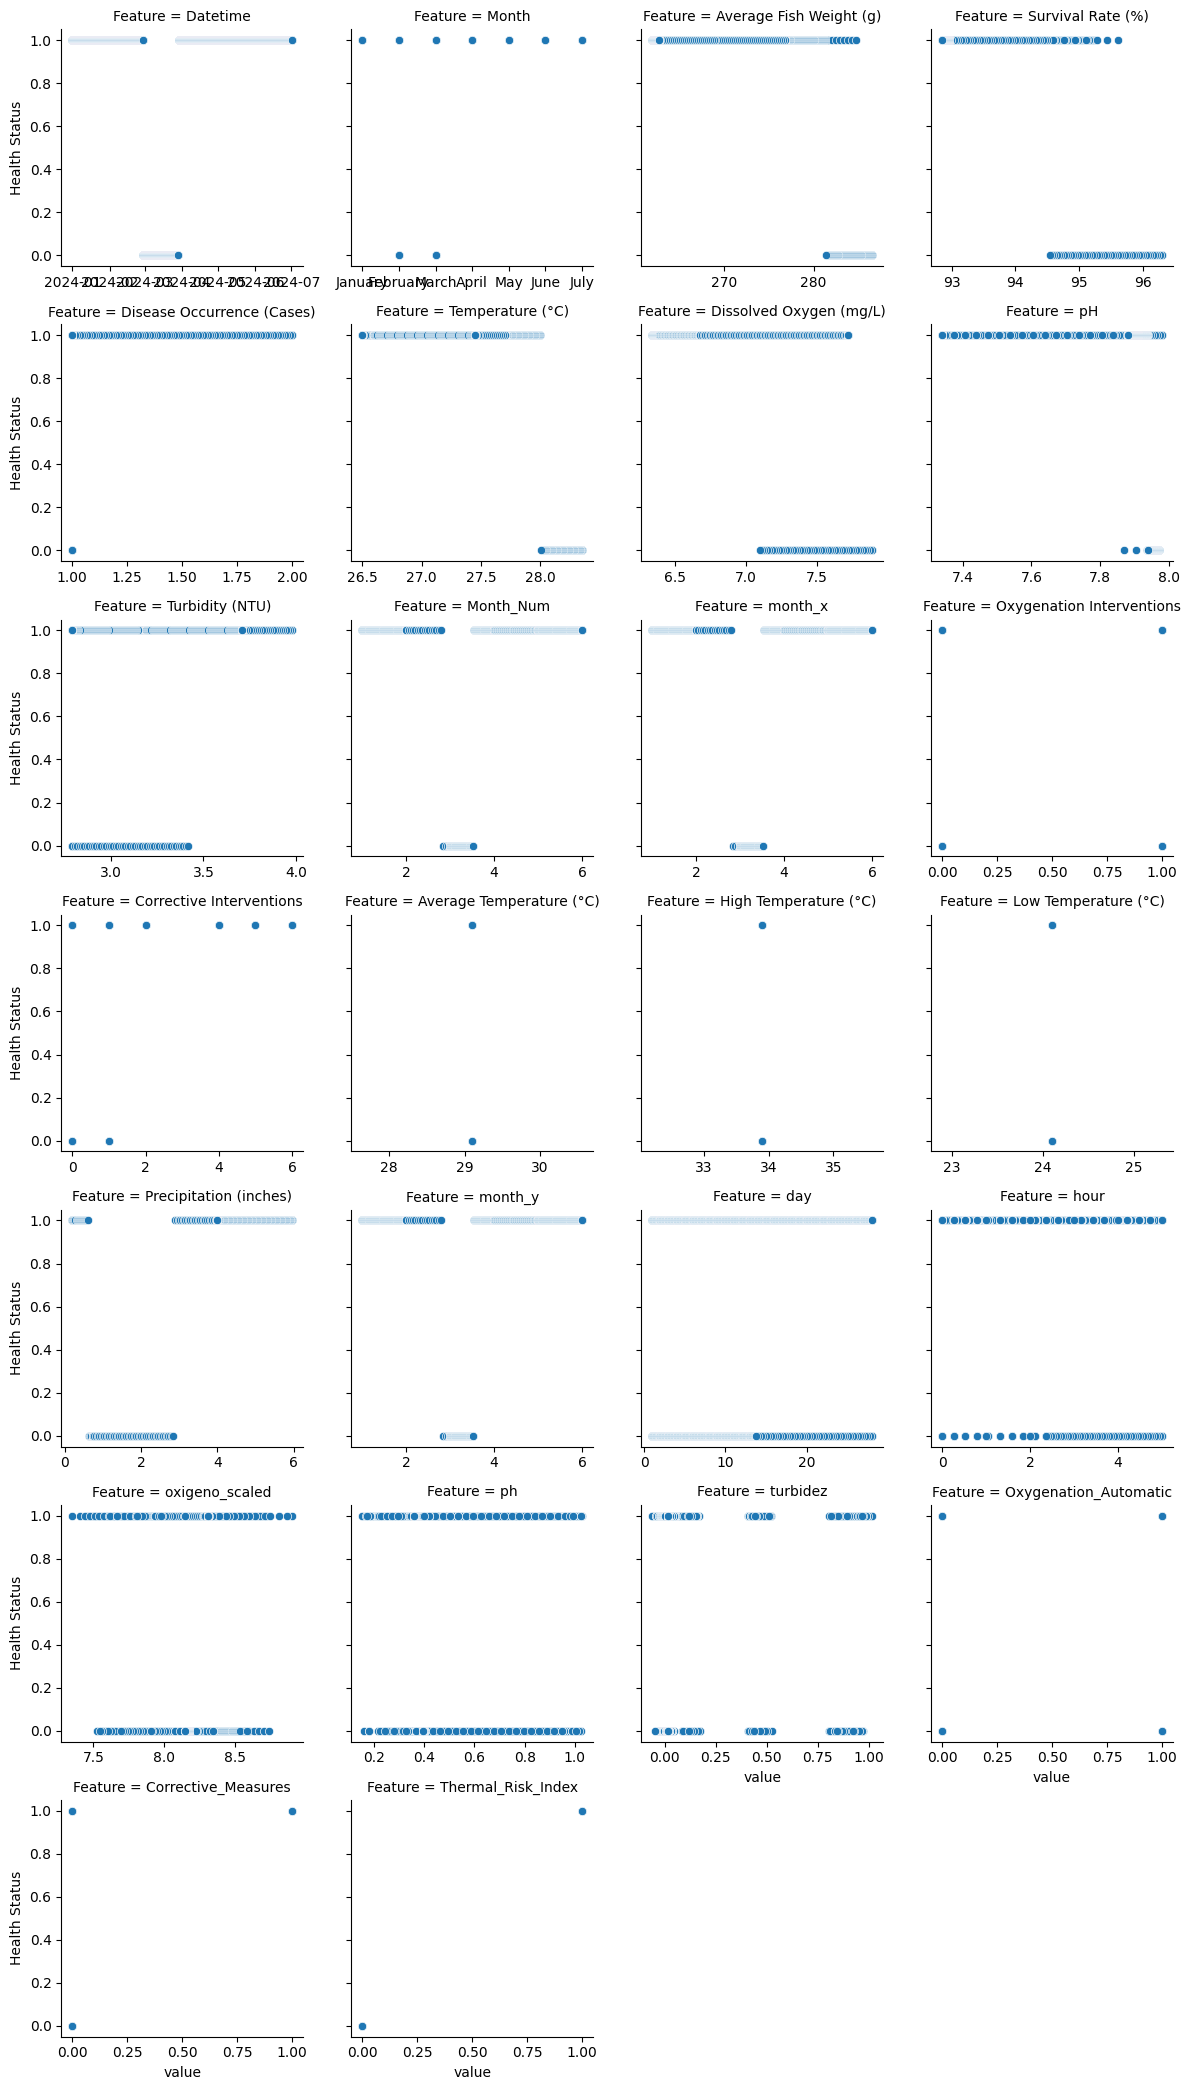

In [62]:
import seaborn as sns

dfm = quality_df.melt(id_vars='Health Status', value_vars=quality_df.columns[:-1], var_name='Feature')

p = sns.relplot(kind='scatter', data=dfm, x='value', y='Health Status', height=3,
                col='Feature', col_wrap=4, facet_kws={'sharex': False})

In [23]:
#dropping the datetime health status and month columns
X = quality_df.drop(['Health Status','Datetime','Month'], axis=1)
y = quality_df['Health Status']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()

In [28]:
logmodel.fit(X_train,y_train)

c:\Users\Sahlah Baby\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [30]:
y_test

670     1
2417    1
596     1
2629    1
1395    1
       ..
1902    0
1936    0
3986    1
4165    1
948     1
Name: Health Status, Length: 1315, dtype: int64

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       219
           1       1.00      1.00      1.00      1096

    accuracy                           1.00      1315
   macro avg       1.00      1.00      1.00      1315
weighted avg       1.00      1.00      1.00      1315



In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
confusion_matrix(y_test,predictions)

array([[ 219,    0],
       [   2, 1094]], dtype=int64)

In [35]:
#get the coefficents of the model. 
coefficients = logmodel.coef_  # Coefficients for each feature
intercept = logmodel.intercept_  # Intercept (bias term)

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [[-0.48239918  0.25012896  0.13295103 -1.07011248 -1.85993836 -0.35693764
   0.58649552 -0.57615024 -0.57615024  0.3528903   0.24209653  1.74953891
   2.03812265  1.44893085  0.85087407 -0.57615024 -0.01533248 -0.22036193
   0.53371652  0.04373899  0.04428907  0.06665302  0.0248102   2.9046473
   0.06012161]]
Intercept: [0.10019821]


## Finding Coefficients Using Gradient Descent

In [36]:
#checking what X looks like
X

,Average Fish Weight (g),Survival Rate (%),Disease Occurrence (Cases),Temperature (°C),Dissolved Oxygen (mg/L),pH,Turbidity (NTU),Month_Num,month_x,Oxygenation Interventions,...,month_y,day,hour,oxigeno_scaled,ph,turbidez,Oxygenation_Automatic,Corrective_Measures,Thermal_Risk_Index,Low_Oxygen_Alert
0,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,0.0,8.355273,0.387898,0.020505,True,False,True,True
1,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,1.0,8.256397,0.343950,0.108561,False,False,True,True
2,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,1,...,1.0,1.0,2.0,8.511549,0.365285,0.410457,True,False,True,True
3,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,3.0,8.362301,0.189601,0.891217,False,False,True,True
4,275.82,95.27,2.0,27.47,6.34,7.98,3.30,1.0,1.0,0,...,1.0,1.0,4.0,8.003350,0.318775,0.936614,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,1,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,True,False,True,True
4379,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,1,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,False,False,True,True
4380,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,0,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,True,False,True,True
4381,262.82,92.85,1.0,27.45,7.72,7.88,3.71,6.0,6.0,0,...,6.0,28.0,5.0,8.307432,0.360661,0.014110,False,False,True,True


In [37]:
#checking X datatype
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Average Fish Weight (g)     4383 non-null   float64
 1   Survival Rate (%)           4383 non-null   float64
 2   Disease Occurrence (Cases)  4383 non-null   float64
 3   Temperature (°C)            4383 non-null   float64
 4   Dissolved Oxygen (mg/L)     4383 non-null   float64
 5   pH                          4383 non-null   float64
 6   Turbidity (NTU)             4383 non-null   float64
 7   Month_Num                   4383 non-null   float64
 8   month_x                     4383 non-null   float64
 9   Oxygenation Interventions   4383 non-null   int64  
 10  Corrective Interventions    4383 non-null   int64  
 11  Average Temperature (°C)    4383 non-null   float64
 12  High Temperature (°C)       4383 non-null   float64
 13  Low Temperature (°C)        4383 

In [38]:
#convert the boolean columns to int
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)



In [39]:
#checking the target column and ensuring its all integers
y

0       1
1       1
2       1
3       1
4       1
       ..
4378    1
4379    1
4380    1
4381    1
4382    1
Name: Health Status, Length: 4383, dtype: int64

In [40]:
X = np.c_[np.ones(X.shape[0]), X]  # Add bias term (intercept)


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
theta = np.zeros(X_train.shape[1])


In [43]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



In [44]:
def log_likelihood(X, y, theta):
    """Compute the log-likelihood function."""
    linear_model = np.dot(X, theta)  # X * theta
    return np.sum(y * linear_model - np.log(1 + np.exp(linear_model)))

In [45]:
def gradient(X, y, theta):
    """Compute the gradient of the log-likelihood function."""
    predictions = sigmoid(np.dot(X, theta))
    return np.dot(X.T, (y - predictions))  # (yi - pi) * xi


In [46]:
def gradient_descent(X, y, theta, learning_rate=0.01, epochs=1000):
    """Perform gradient descent to optimize theta."""
    for _ in range(epochs):
        theta += learning_rate * gradient(X, y, theta)
    return theta

In [47]:
def predict(X, theta):
    """Predict binary labels using the trained logistic regression model."""
    return (sigmoid(np.dot(X, theta)) >= 0.5).astype(int)

In [48]:
theta = gradient_descent(X_train, y_train, theta, learning_rate=0.01, epochs=4000)


C:\Users\Sahlah Baby\AppData\Local\Temp\ipykernel_30452\1928050520.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [49]:
print(f"Optimized theta: {theta}")


Optimized theta: [ 6.56470825e+02 -1.10568763e+04  2.06209034e+04  4.71314604e+03
  3.37548277e+02 -1.51883514e+04  2.12743102e+03  1.09324952e+04
  2.35665806e+03  2.35665806e+03  5.10693735e+02  1.15407985e+04
  1.91033010e+04  2.22543610e+04  1.58209469e+04  2.76426635e+04
  2.35665806e+03 -8.85499278e+02  3.40011554e+02  5.80575572e+03
 -5.66007097e+00  1.80323707e+02  1.57964106e+02  5.18050088e+02
  1.59476908e+04  6.56470825e+02]


In [50]:
theta

array([ 6.56470825e+02, -1.10568763e+04,  2.06209034e+04,  4.71314604e+03,
        3.37548277e+02, -1.51883514e+04,  2.12743102e+03,  1.09324952e+04,
        2.35665806e+03,  2.35665806e+03,  5.10693735e+02,  1.15407985e+04,
        1.91033010e+04,  2.22543610e+04,  1.58209469e+04,  2.76426635e+04,
        2.35665806e+03, -8.85499278e+02,  3.40011554e+02,  5.80575572e+03,
       -5.66007097e+00,  1.80323707e+02,  1.57964106e+02,  5.18050088e+02,
        1.59476908e+04,  6.56470825e+02])

# comparing to optimized values 
Coefficients: [[-0.48239918  0.25012896  0.13295103 -1.07011248 -1.85993836 -0.35693764
   0.58649552 -0.57615024 -0.57615024  0.3528903   0.24209653  1.74953891
   2.03812265  1.44893085  0.85087407 -0.57615024 -0.01533248 -0.22036193
   0.53371652  0.04373899  0.04428907  0.06665302  0.0248102   2.9046473
   0.06012161]]
Intercept: [0.10019821]

In [51]:
# Predictions
predictions = predict(X_test, theta)
accuracy = np.mean(predictions == y_test)

In [52]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.35%


## Using the Newton-Raphson Method

In [57]:
X

array([[  1.  , 275.82,  95.27, ...,   0.  ,   1.  ,   1.  ],
       [  1.  , 275.82,  95.27, ...,   0.  ,   1.  ,   1.  ],
       [  1.  , 275.82,  95.27, ...,   0.  ,   1.  ,   1.  ],
       ...,
       [  1.  , 262.82,  92.85, ...,   0.  ,   1.  ,   1.  ],
       [  1.  , 262.82,  92.85, ...,   0.  ,   1.  ,   1.  ],
       [  1.  , 262.82,  92.85, ...,   0.  ,   1.  ,   1.  ]])

In [55]:
theta = np.zeros(X_train.shape[1])


In [59]:
#using NewtonRaphson method to optimize theta
def hessian(X, theta):
    """Compute the Hessian of the log-likelihood function."""
    predictions = sigmoid(np.dot(X, theta))
    S = np.diag(predictions * (1 - predictions))
    return X.T.dot(S).dot(X)

# def newton_raphson(X, y, theta, learning_rate=0.01, epochs=1000):
#     for _ in range(epochs):
#         gradient_value = gradient(X, y, theta)
#         hessian_value = hessian(X, theta)
#         theta += learning_rate * np.linalg.inv(hessian_value).dot(gradient_value)
#     return theta
def newton_raphson(X, y, theta, max_iters=10):
    """Optimize theta using the Newton-Raphson method."""
    for _ in range(max_iters):
        grad = gradient(X, y, theta)
        H = hessian(X, theta)
        theta += np.linalg.inv(H) @ grad  # Newton-Raphson update
    return theta

theta = newton_raphson(X_train, y_train, theta, max_iters=1000)

print(f"Optimized theta: {theta}")

LinAlgError: Singular matrix

In [53]:
def hessian(X, theta):
    """Compute the Hessian matrix (second derivative of log-likelihood)."""
    predictions = sigmoid(np.dot(X, theta))
    diag = np.diag(predictions * (1 - predictions))  # Diagonal weight matrix
    return np.dot(X.T, np.dot(diag, X))  # X' * W * X